### Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB
None

### Descriptive Statistics of Numerical Features:
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.6223

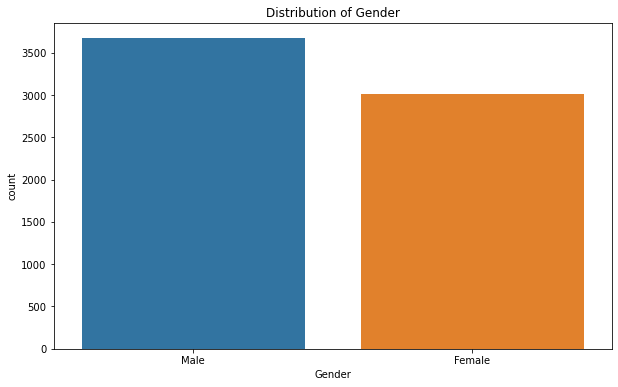

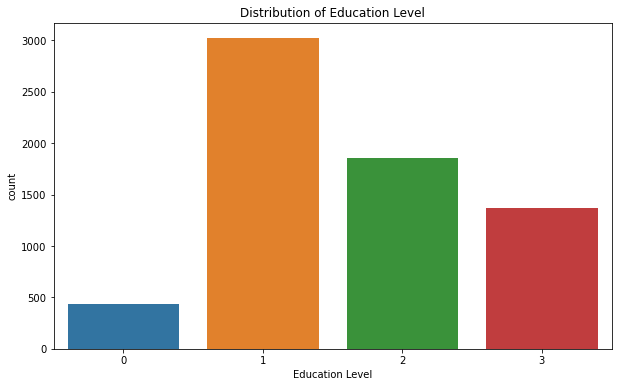

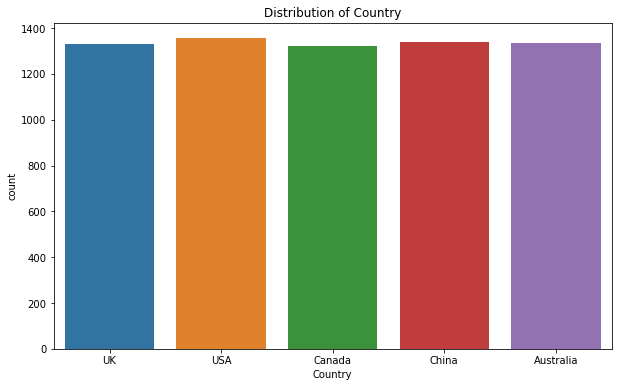

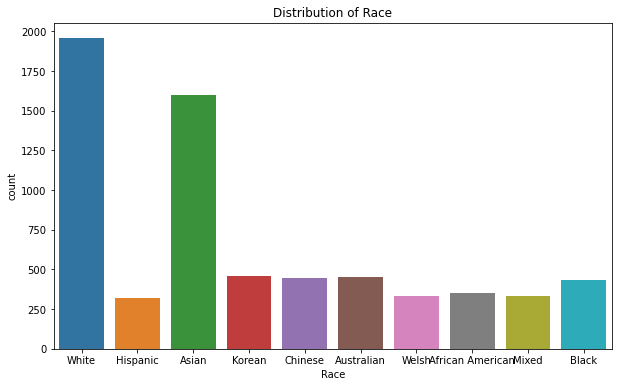

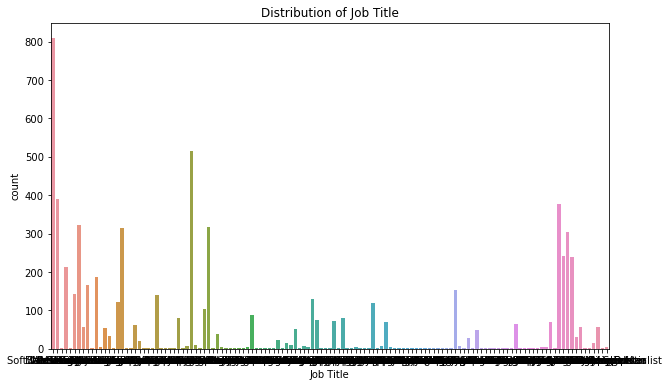

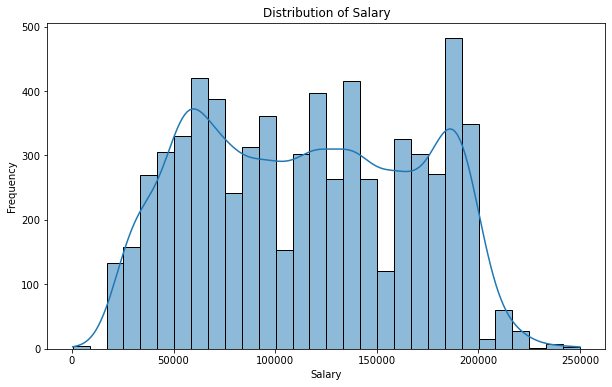


### Linear Regression Evaluation:

### R2 Score: -5.152909513504648e+25

### Mean Squared Error: 1.431947899955225e+35

### Random Forest Evaluation:

### R2 Score: 0.9721822681116654

### Mean Squared Error: 77303012.31687312
Accuracy: 0.22139117427075541
Recall: 0.22139117427075541
Precision: 0.8180831546693846
F1 Score: 0.3310428407357037



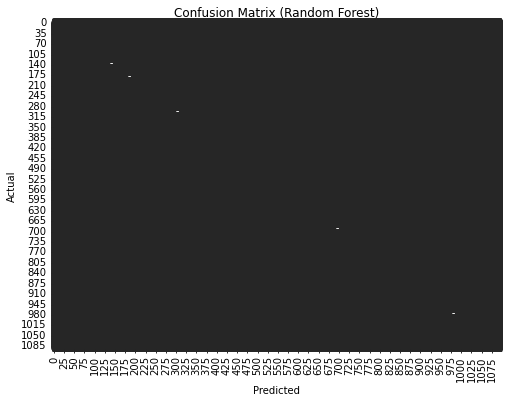


### SVM Evaluation:

### R2 Score: 0.026403811774852626

### Mean Squared Error: 2705537548.213642
Accuracy: 0.0
Recall: 0.0
Precision: 0.0
F1 Score: 0.0



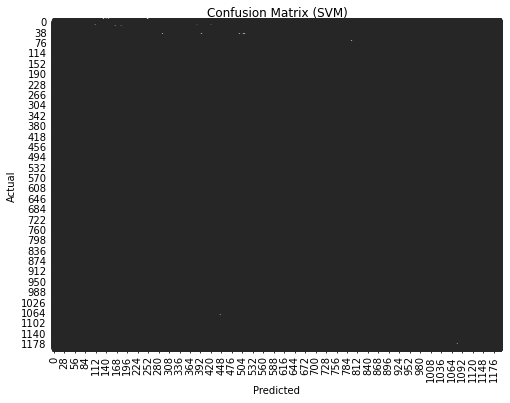


### K-Means Clustering Evaluation:

### R2 Score: -4.784080743467015

### Mean Squared Error: 16073447926.986538

### The best model is: Random Forest

### Best Model Evaluation:
{'R2 Score': 0.9721822681116654, 'Mean Squared Error': 77303012.31687312, 'Accuracy': 0.22139117427075541, 'Recall': 0.22139117427075541, 'Precision': 0.8180831546693846, 'F1 Score': 0.3310428407357037}

### Selected Model Evaluation Results
                Model      R2 Score  Mean Squared Error  Accuracy    Recall  \
0   Linear Regression -5.152910e+25        1.431948e+35       NaN       NaN   
1       Random Forest  9.721823e-01        7.730301e+07  0.221391  0.221391   
2                 SVM  2.640381e-02        2.705538e+09  0.000000  0.000000   
3  K-Means Clustering -4.784081e+00        1.607345e+10       NaN       NaN   

   Precision  F1 Score  
0        NaN       NaN  
1   0.818083  0.331043  
2   0.000000  0.000000  
3        NaN       NaN  


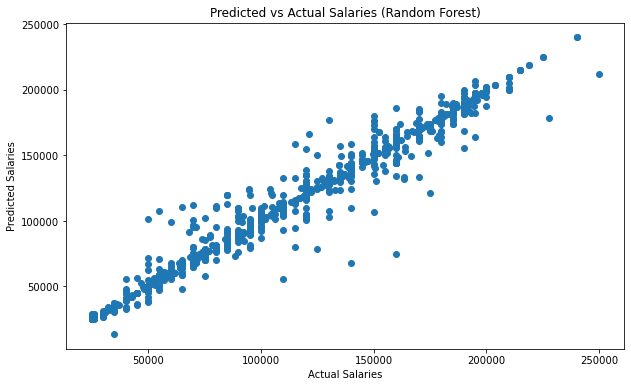

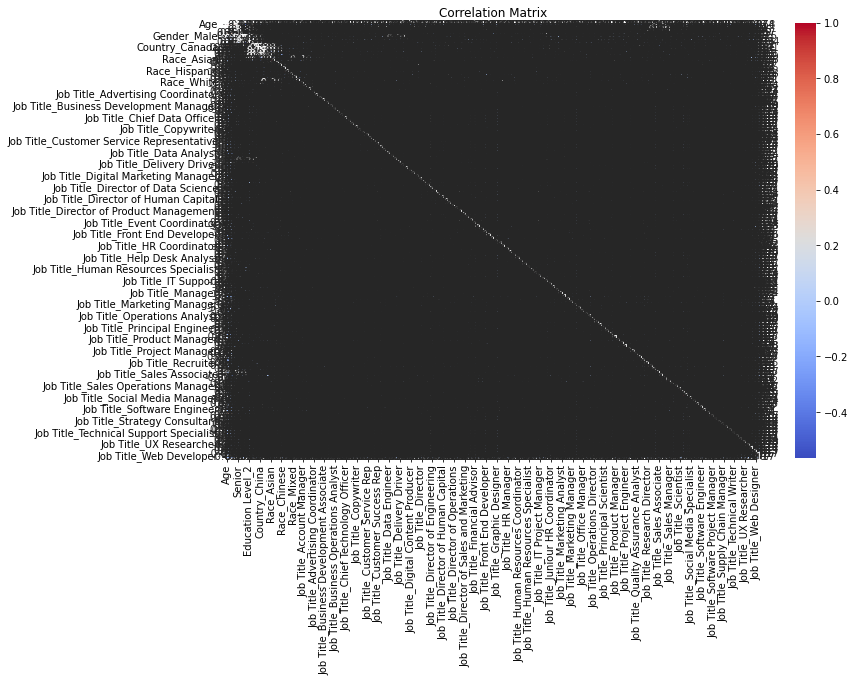

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
from colorama import Fore, Style  # Import colorama
import warnings

# Filter out warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
filepath = "C:\\Users\\kweku\\OneDrive\\Desktop\\Salary.csv"

salary_data = pd.read_csv(filepath)

# Display basic information about the dataset
print("### Basic Information about the Dataset:")
print(salary_data.info())

# Display descriptive statistics of numerical features
print("\n### Descriptive Statistics of Numerical Features:")
print(salary_data.describe())

# Display the first 20 rows of the dataset
print("\n### First 20 rows of the dataset:")
print(salary_data.head(20))

# Check for missing values
print("\n### Missing Values:")
print(salary_data.isnull().sum())

# One-hot encode categorical variables
categorical_columns = ['Gender', 'Education Level', 'Country', 'Race', 'Job Title']
salary_data_encoded = pd.get_dummies(salary_data, columns=categorical_columns, drop_first=True)

# Display the updated dataset
print("\n### Updated Dataset after One-Hot Encoding:")
print(salary_data_encoded.head())

# Split the data into features (X) and target variable (y)
X = salary_data_encoded.drop('Salary', axis=1)
y = salary_data_encoded['Salary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Visualize the distribution of categorical variables
categorical_columns = ['Gender', 'Education Level', 'Country', 'Race', 'Job Title']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=salary_data)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualize the distribution of the target variable 'Salary'
plt.figure(figsize=(10, 6))
sns.histplot(salary_data['Salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Select machine learning algorithms

# Linear Regression
linear_reg_model = LinearRegression()

# Random Forest Regression with hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)
rf_model = grid_search_rf.best_estimator_

# Support Vector Machines (SVM) with hyperparameter tuning
svm_model = SVR()
param_grid_svm = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001]}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='neg_mean_squared_error', cv=5)
grid_search_svm.fit(X_train, y_train)
svm_model = grid_search_svm.best_estimator_

# K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Evaluate the models

# List of models and their names
models = [linear_reg_model, rf_model, svm_model, kmeans_model]
model_names = ['Linear Regression', 'Random Forest', 'SVM', 'K-Means Clustering']

# Initialize variables to store the best model and its evaluation metrics
best_model = None
best_model_name = ""
best_r2_score = -float('inf')
best_results = None

# Dictionary to store evaluation results
results = {'Model': [], 'R2 Score': [], 'Mean Squared Error': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}

# Color map for visualization
color_map = {'R2 Score': 'blue', 'Mean Squared Error': 'green', 'Accuracy': 'red', 'Recall': 'blue', 'Precision': 'green', 'F1 Score': 'red'}

# Loop through each model and evaluate
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Additional evaluation metrics
    if name == 'Linear Regression' or name == 'K-Means Clustering':
        accuracy, recall, precision, f1 = None, None, None, None
    else:
        rounded_predictions = [round(pred) for pred in predictions]
        accuracy = accuracy_score(y_test, rounded_predictions)
        recall = recall_score(y_test, rounded_predictions, average='weighted')
        precision = precision_score(y_test, rounded_predictions, average='weighted')
        f1 = f1_score(y_test, rounded_predictions, average='weighted')

    # Save evaluation results
    results['Model'].append(name)
    results['R2 Score'].append(r2)
    results['Mean Squared Error'].append(mse)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)

    # Print evaluation metrics for each model
    print(f"\n### {name} Evaluation:")
    print(f"\n### R2 Score: {r2}")
    print(f"\n### Mean Squared Error: {mse}")

    if accuracy is not None:
        print(f"Accuracy: {Fore.RED if accuracy < 0.5 else Fore.GREEN}{accuracy}")
        print(f"Recall: {Fore.RED if recall < 0.5 else Fore.BLUE}{recall}")
        print(f"Precision: {Fore.RED if precision < 0.5 else Fore.GREEN}{precision}")
        print(f"F1 Score: {Fore.RED if f1 < 0.5 else Fore.BLUE}{f1}\n")

        # Confusion Matrix for classification models
        cm = confusion_matrix(y_test, rounded_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.title(f'Confusion Matrix ({name})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Check for the best model based on R2 Score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model
        best_model_name = name
        best_results = {'R2 Score': r2, 'Mean Squared Error': mse,
                        'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Print the best model
print(f"\n### The best model is: {best_model_name}")
print(f"\n### Best Model Evaluation:")
print(best_results)

# Print the evaluation results in a tabular form
results_df = pd.DataFrame(results)
selected_metrics = ['R2 Score', 'Mean Squared Error', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
selected_results_df = results_df[['Model'] + selected_metrics]

# Display the selected evaluation results in a table
print(f"\n### Selected Model Evaluation Results")
print(selected_results_df)

# Visualizations of model predictions and performance

# Scatter plot of predicted vs actual salaries for the best model
tuned_predictions = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tuned_predictions)
plt.title(f'Predicted vs Actual Salaries ({best_model_name})')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.show()

# Correlation Matrix
correlation_matrix = salary_data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
